In [1]:
filepath = '~/Documents/RedRoot/csv/Attendee/83756443477 - Attendee Report.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mpld3
import math
plt.rcParams['figure.dpi'] = 150
plt.style.use('ggplot')

defaultpie = {
    "autopct":"(%1.1f%%)",
    "pctdistance":0.8,
    "labeldistance":1.1,
    "rotatelabels":False,
    "textprops":{'fontsize':'xx-small'}
}

def get_count(key,df):
    return df.groupby(key)[key].count()

def shorten(s):
    if (s.startswith('Division')):
        i = s.index('(')
        return s[0:i]
    else:
        return s
    
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper
    
def get_percent(counts):
    return np.array(list(map(lambda x: round(x / sum(counts),3)*100, counts)))

def get_table(s):
    return pd.DataFrame(np.vstack([s.values, get_percent(s.values)]).T,
                       columns=['Count', '%'], index=s.index)

In [3]:
df = pd.read_csv(filepath, index_col=False).drop_duplicates('Email')
df = df[df['NRCP Membership'] == 'Non-Member']
df = df[df['Attended'] == 'Yes']

In [4]:
age = get_count('Age',df)
get_table(age)

,Count,%
Age,,
60 and above,6.0,2.2
"=""19-29""",141.0,51.3
"=""30-39""",68.0,24.7
"=""40-49""",27.0,9.8
"=""50-59""",20.0,7.3
below 18,13.0,4.7


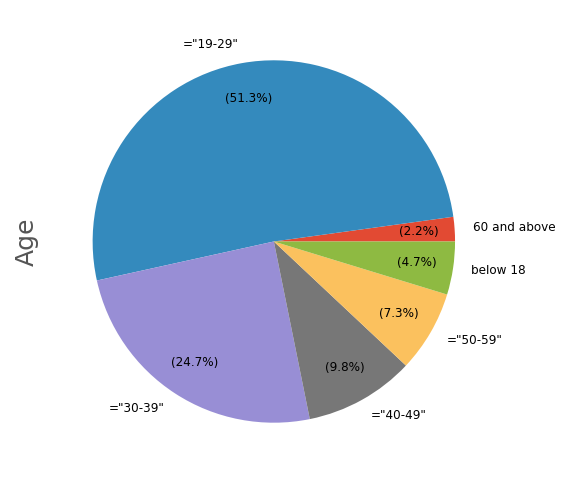

In [5]:
age.plot.pie(**defaultpie)
plt.show()

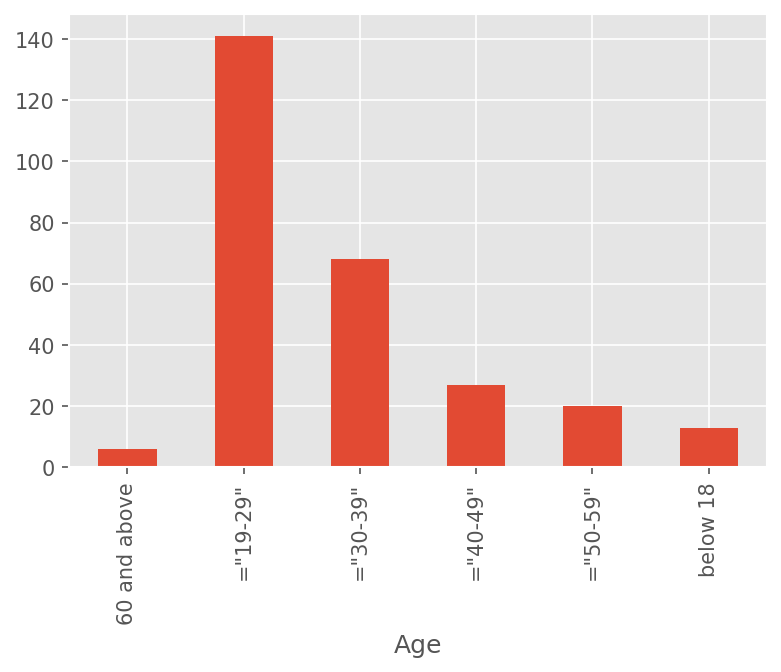

In [13]:
age.plot.bar()
plt.show()

In [7]:
sex = get_count('Sex', df)
get_table(sex)

,Count,%
Sex,,
Female,174.0,63.3
Male,101.0,36.7


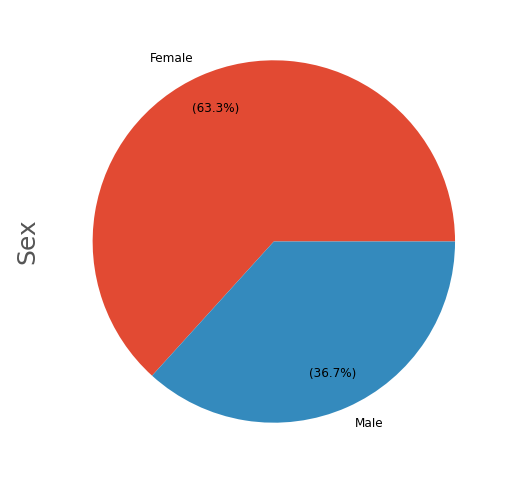

In [14]:
sex.plot.pie(**defaultpie)
plt.show()

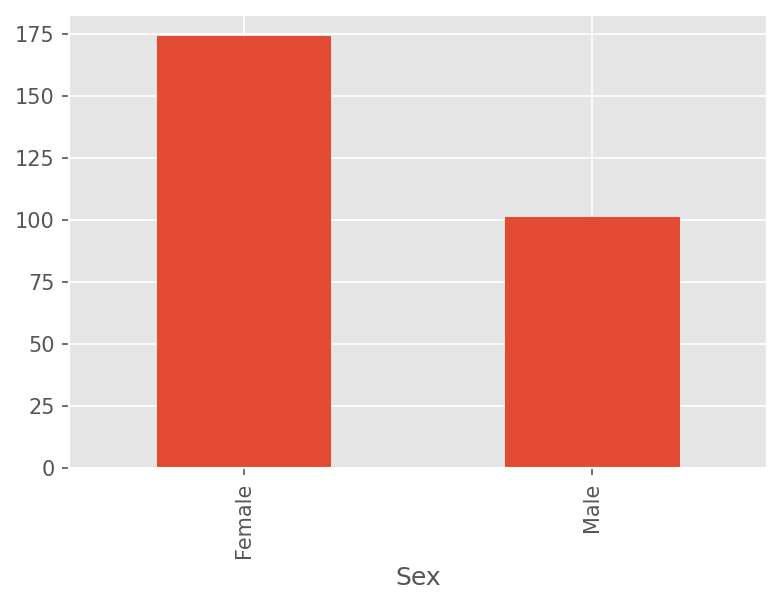

In [15]:
sex.plot.bar()
plt.show()

In [10]:
region = get_count('Region (in the Philippines)', df)
get_table(region)

,Count,%
Region (in the Philippines),,
BARMM,3.0,1.1
CAR,4.0,1.5
I,4.0,1.5
II,4.0,1.5
III,26.0,9.5
IV-A,31.0,11.3
IV-B,18.0,6.5
IX,1.0,0.4
NCR,123.0,44.7


<AxesSubplot:ylabel='Region (in the Philippines)'>

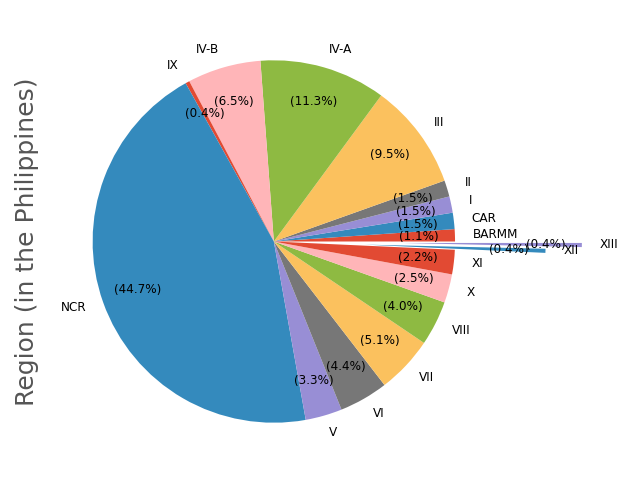

In [11]:
ex = [0] * len(region)
ex[-2] = 0.5
ex[-1] = 0.7
region.plot.pie(**defaultpie,explode=ex, startangle=0)

In [12]:
print(get_count('Organization', df).to_string())

Organization
A;LS                                                                    1
ADAMSON UNIVERSITY                                                      1
ALS                                                                     4
APEC Schools                                                            1
Acacia National High School                                             1
Adamson University                                                      1
Affordable Private Education Center,  Inc.                              1
Agustinian School of Cabuyao                                            1
Albukhary International University                                      1
Als                                                                     2
Ateneo de Cagayan                                                       1
Ateneo de Manila University                                             2
BULACAN STATE UNIVERSITY                                                1
Batangas State University